<a href="https://colab.research.google.com/github/PKpacheco/project4_intro_ai/blob/main/(music)Project_4_Intro_AI_Paola_Pacheco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Project 4: Music Genre Classification (part 1)
Intro to AI
\
Instructor: Jeffrey Lanyon
\
Student: Paola Katherine Pacheco


**Objectives**: First, implement a machine learning model to classify music files into different
genres based on their audio features. Second, improve the spam classifier from the previous
project.

**Introduction:**
In this assignment, you will build a neural network model that can classify music files into
various genres using Mel-frequency cepstral coefficients (MFCCs) as features. You will use
Python libraries such as Librosa for audio processing, Keras, and TensorFlow for building and
training the neural network. Additionally, you will build a NN to improve the spam classifier
from the previous project.

**Requirements:**
1. Python Libraries: Ensure you have librosa, keras, and tensorflow installed in your
Python environment.
2. Datasets: You will use the GTZAN genre collection. Make sure you are familiar with the
dataset before you begin working on the coding portion. You will also need the YouTube
comments dataset from the last project.
3. Note: You may use the code snippets and functions provided in class or use your own
novel approach to accomplish the tasks outlined in the problems.


# Imports

In [ ]:
# mount drive to use files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install librosa
# !pip install keras
# !pip install tensorflow

In [ ]:
import os

import librosa
import librosa.feature
import librosa.display
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow_datasets as tfds


from keras.models import Sequential
from keras.layers import Dense, Activation

#1 Data Visualization:

* Write a function display_mfcc(song) that takes a music file as input, computes
its MFCCs, and displays the MFCCs. You may use the code provided in class for
this task or accomplish this task as you wish.
* Test this function with one song from each genre from the dataset.
* Display all of graphs for the songs you choose

In [ ]:
# get dataset
gtzan = tfds.audio.gtzan.GTZAN()

In [ ]:
url_genres= '/content/drive/MyDrive/Colab Notebooks/intro to ai/project_4/genres'

In [ ]:
# get all subfolders
genres = [folder for folder in os.listdir(url_genres) if os.path.isdir(os.path.join(url_genres, folder))]

In [ ]:
# print all genres
genres

['rock',
 'reggae',
 'pop',
 'metal',
 'jazz',
 'hiphop',
 'disco',
 'country',
 'classical',
 'blues']

In [ ]:
def display_mfcc(song):
  y,sr = librosa.load(song)
  mfcc = librosa.feature.mfcc(y=y, sr=sr)

  plt.figure(figsize=(10,4))
  librosa.display.specshow(mfcc, x_axis='time', y_axis='mel')
  plt.colorbar()
  plt.title(f'MFCC of{song}')
  plt.tight_layout()
  plt.show()

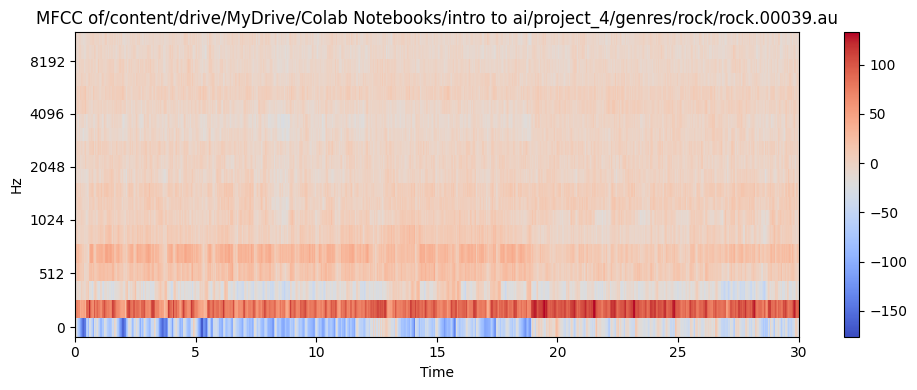

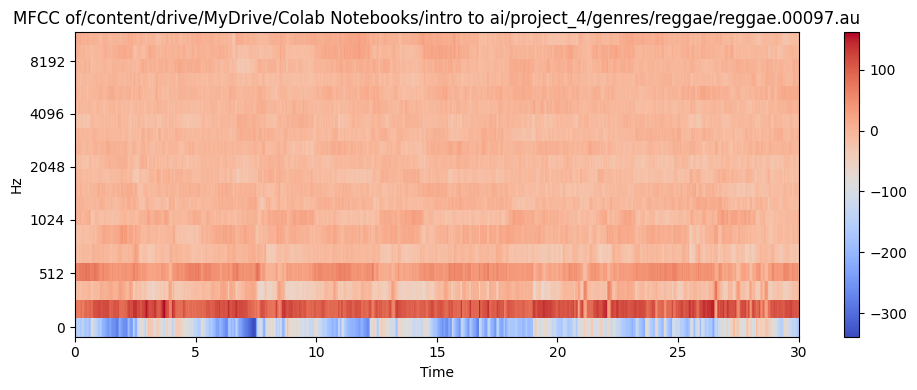

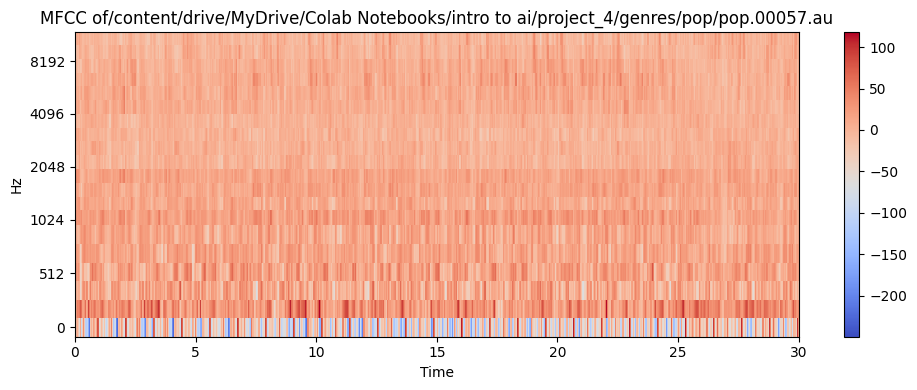

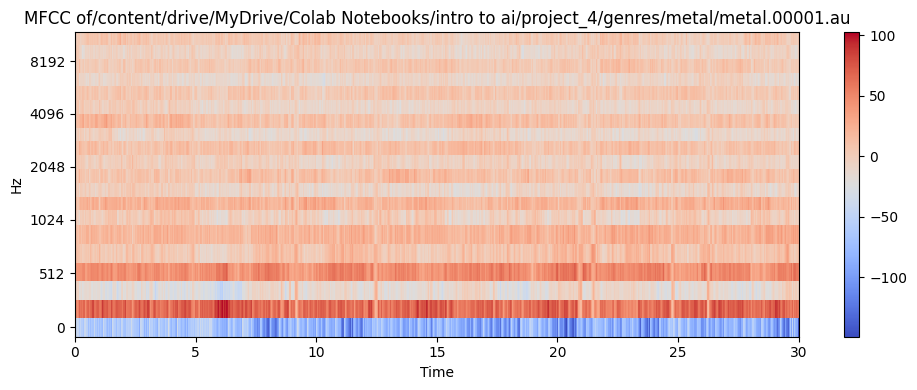

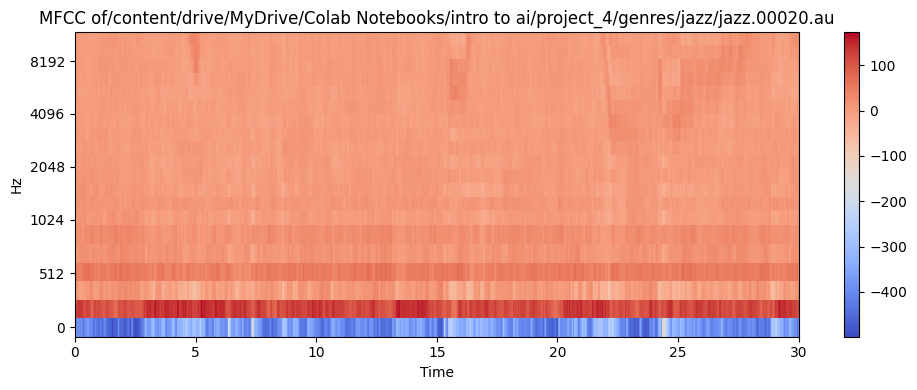

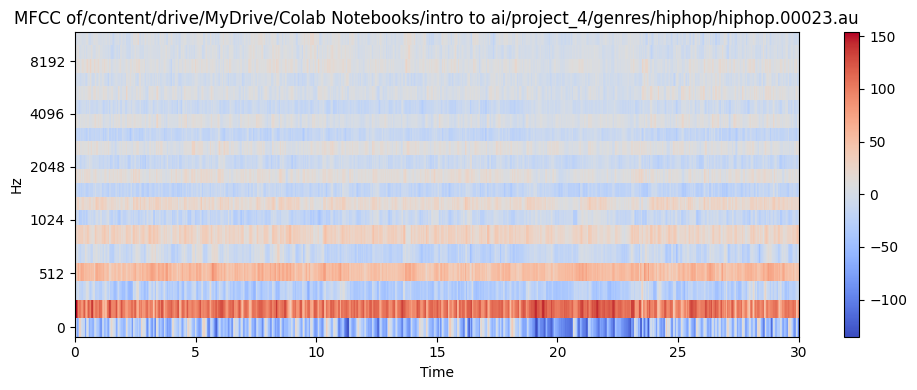

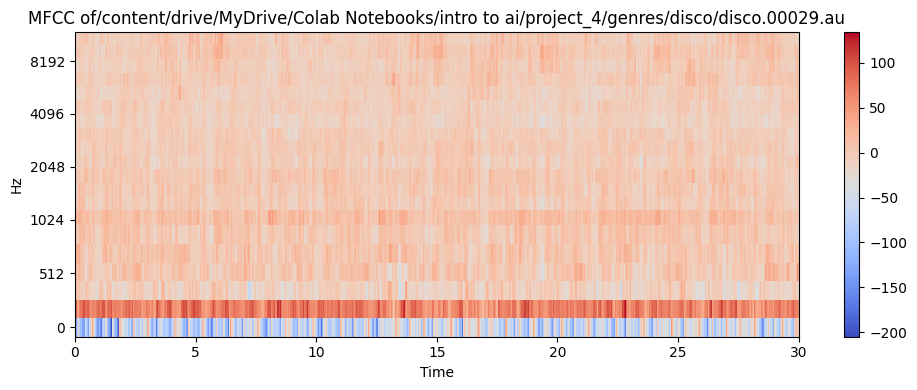

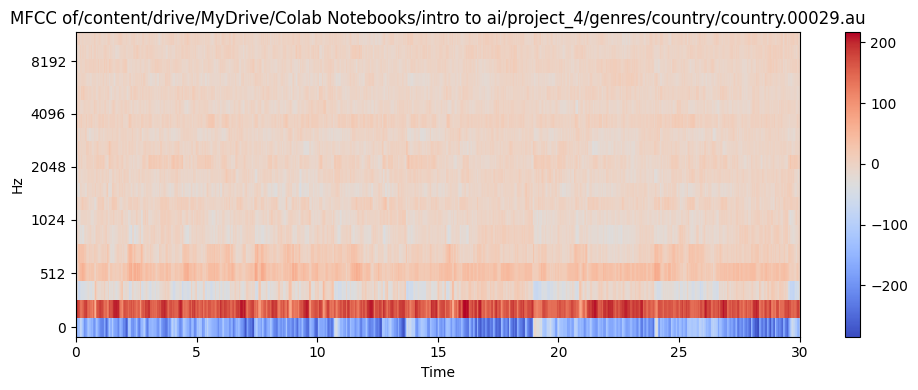

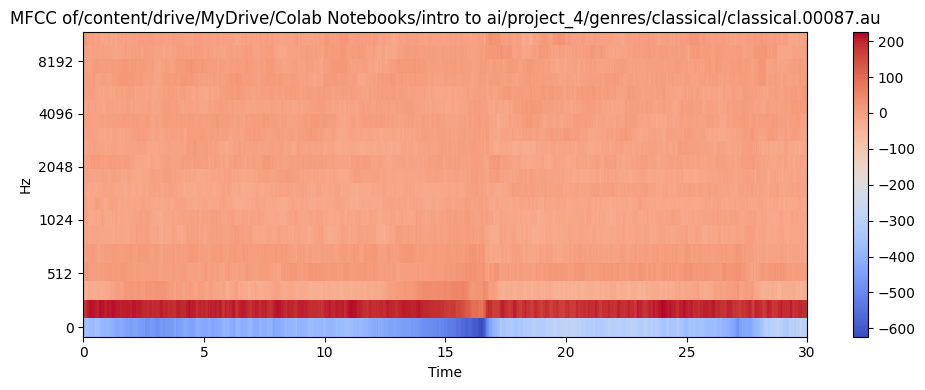

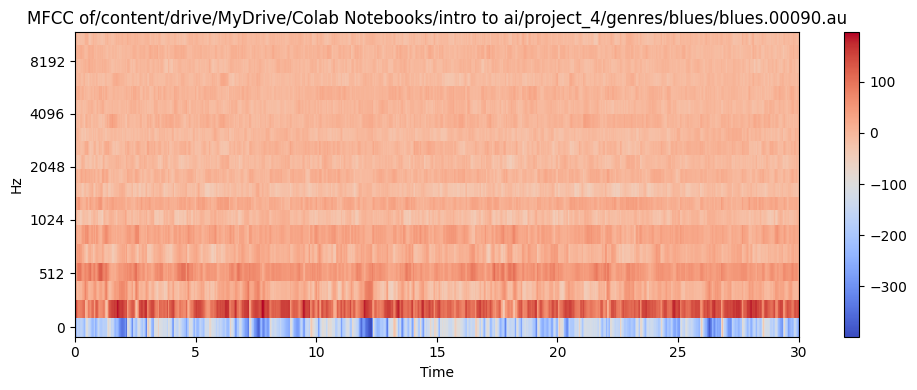

In [ ]:
for genre in genres:
    # Get the list of audio files in the genre subfolder
    genre_folder = os.path.join(url_genres, genre)
    audio_files = [os.path.join(genre_folder, file) for file in os.listdir(genre_folder) if file.endswith('.au')]

    # get only 1 file inside each genre
    if audio_files:
        display_mfcc(audio_files[0])

#2 Feature Extraction:
* Implement the extract_features_song(f) function to extract MFCC features
from a given song file.
* Normalize these features as done in the provided code.


In [ ]:
def extract_features_song(file_path):
    # load the audio path
    y, sr = librosa.load(file_path)

    # extract mfcc features
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    # normalize
    normalized_mfcc = (mfcc - np.mean(mfcc, axis=1, keepdims=True)) / (np.std(mfcc, axis=1, keepdims=True) + 1e-8)

    return normalized_mfcc


In [ ]:

# Example usage:
file_path = '/path/to/your/song.mp3'
features = extract_features_song(file_path)
print("Shape of extracted features:", features.shape)


#3. Feature and Label Preparation:
* Modify the generate_features_and_labels() function to process all songs in
your dataset, extract features using the above function, and create genre labels for
each song.
* Convert these labels into a one-hot encoded format.


#4. Model Building:
* Construct a neural network using Keras with at least two layers: a dense layer
with ReLU activation and an output layer with softmax activation.
* Compile the model with appropriate loss and optimizer functions.


#5. Training and Evaluation:
Split your data into training and testing sets and train your
model on the training data. Evaluate the performance of your model on the test data and
output the loss and accuracy. The following outlines how to appropriately prep the data,
you may use the detailed outline or prep your data as you wish